In [22]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import strym
from strym import strymread
from strym import strymmap

# Test Case 1: Mini-Test 1

In [2]:
folder = '../PandaData/2020_07_08/'

toyota = "2020-07-08-15-15-54_2T3MWRFVXLW056972"
toyota_can_file = folder + toyota + "_CAN_Messages.csv"
toyota_gps_file = folder + toyota + "_GPS_Messages.csv"
toyota_dashcam_A = folder + toyota + "_dashcamA.mp4"
toyota_dashcam_B = folder + toyota + "_dashcamB.mp4"

honda = "2020-07-08-13-15-02_5FNYF6H05HB089022"
honda_can_file = folder + honda + "_CAN_Messages.csv"
honda_gps_file = folder + honda + "_GPS_Messages.csv"
honda_dashcam = folder + honda + "_dashcam.mp4"

In [4]:
r_toyota = strymread(csvfile=toyota_can_file)
r_honda = strymread(csvfile=honda_can_file)
r_toyota.dataframe['Time'] = r_toyota.dataframe['Time']

[2021_02_20_20_19_50] (numexpr.utils) INFO: NumExpr defaulting to 8 threads.
[2021_02_20_20_20_22] (cantools.database.can.database) WARNING: Overwriting message 'GAS_PEDAL' with 'GAS_PEDAL' in the name to message dictionary.


In [5]:
toyota_speed = r_toyota.speed()
honda_speed = r_honda.speed()
toyota_speed['Message'] = toyota_speed['Message']*0.277778
honda_speed['Message'] = honda_speed['Message']*0.277778

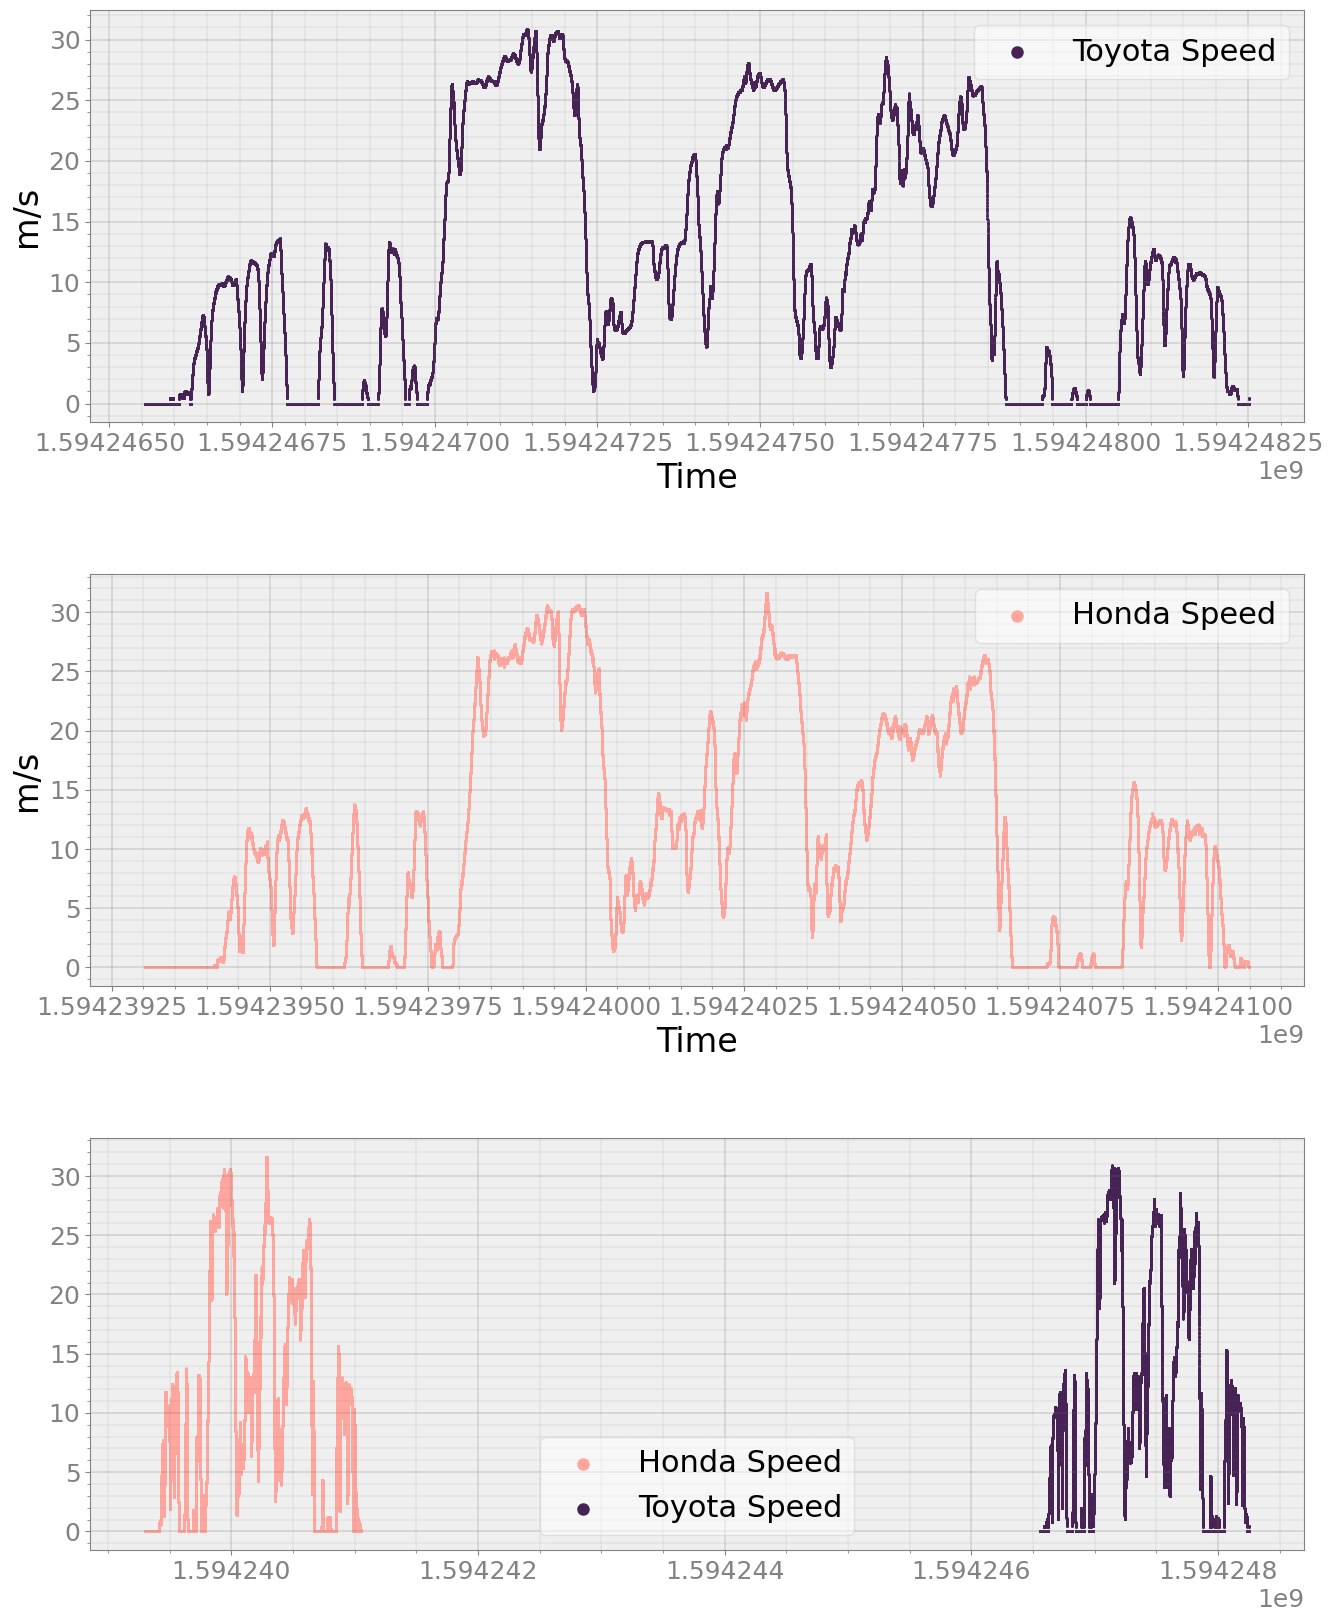

In [6]:
fig, ax = strymread.create_fig(3)
ax[0].scatter(x = toyota_speed['Time'], y = toyota_speed['Message'], s = 1, color = "#462255")
ax[1].scatter(x = honda_speed['Time'], y = honda_speed['Message'], s = 1, color = "#FFA69E")
ax[2].scatter(x = honda_speed['Time'], y = honda_speed['Message'], s = 1, color = "#FFA69E")
ax[2].scatter(x = toyota_speed['Time'], y = toyota_speed['Message'], s = 1, color = "#462255")
ax[0].legend(["Toyota Speed"])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("m/s")
ax[1].legend(["Honda Speed"])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("m/s")

ax[2].legend(["Honda Speed", "Toyota Speed"])

plt.show()

In [12]:
toyota_long_dist = r_toyota.long_dist(np.arange(0, 16))
toyota_lat_dist = r_toyota.lat_dist(np.arange(0, 16))
toyota_rel = r_toyota.rel_velocity(np.arange(0, 16))

# Concatenate long, lat and relative vel of all tracks to a single dataframe
toyota_long_dist = pd.concat(toyota_long_dist)
toyota_lat_dist = pd.concat(toyota_lat_dist)
toyota_rel = pd.concat(toyota_rel)

toyota_long_dist['Long'] = toyota_long_dist['Message']
toyota_long_dist['Lat'] = toyota_lat_dist['Message']
toyota_long_dist['Relvel'] = toyota_rel['Message']
toyota_long_dist.drop(columns=['Message'], inplace=True)




toyota_lead_state = toyota_long_dist
toyota_lead_state.sort_values(by='Time', inplace=True)
toyota_lead_state

,Time,Bus,Long,Lat,Relvel
Clock,,,,,
2020-07-08 22:15:55.252307891,1.594247e+09,1,1.84,0.08,0.000
2020-07-08 22:15:55.252449989,1.594247e+09,1,6.36,2.16,-0.050
2020-07-08 22:15:55.252606153,1.594247e+09,1,327.64,0.00,0.000
2020-07-08 22:15:55.252606153,1.594247e+09,1,43.64,-6.12,0.000
2020-07-08 22:15:55.252606153,1.594247e+09,1,9.20,-2.84,0.025
...,...,...,...,...,...
2020-07-08 22:44:10.984752893,1.594248e+09,1,11.40,-5.48,-0.475
2020-07-08 22:44:10.985623121,1.594248e+09,1,4.56,1.76,-0.375
2020-07-08 22:44:10.985749960,1.594248e+09,1,6.44,1.88,-0.400


In [13]:
toyota_lead_state = toyota_lead_state[np.abs(toyota_lead_state['Lat']) <= 0.5]
toyota_lead_state

,Time,Bus,Long,Lat,Relvel
Clock,,,,,
2020-07-08 22:15:55.252307891,1.594247e+09,1,1.84,0.08,0.000
2020-07-08 22:15:55.252606153,1.594247e+09,1,327.64,0.00,0.000
2020-07-08 22:15:55.252922058,1.594247e+09,1,76.08,-0.16,0.100
2020-07-08 22:15:55.253081082,1.594247e+09,1,327.64,0.00,0.000
2020-07-08 22:15:55.253081082,1.594247e+09,1,327.64,0.00,0.000
...,...,...,...,...,...
2020-07-08 22:44:10.980763197,1.594248e+09,1,64.40,0.36,-0.100
2020-07-08 22:44:10.982832909,1.594248e+09,1,327.64,0.00,0.000
2020-07-08 22:44:10.984635830,1.594248e+09,1,9.12,-0.04,-0.500


In [14]:
lead_rel = pd.DataFrame()
lead_rel['Time'] = toyota_lead_state['Time']
lead_rel['Message'] = toyota_lead_state['Relvel']

In [15]:
toyota_speed_resampled, rel_resampled = strymread.ts_sync(toyota_speed, lead_rel, rate="second")

## Estimate the lead vehicle's speed

In [32]:
lead_reoncstructed = pd.DataFrame()
lead_reoncstructed['Time'] = toyota_speed_resampled['Time']
lead_reoncstructed['Message'] = toyota_speed_resampled['Message'] - rel_resampled['Message']

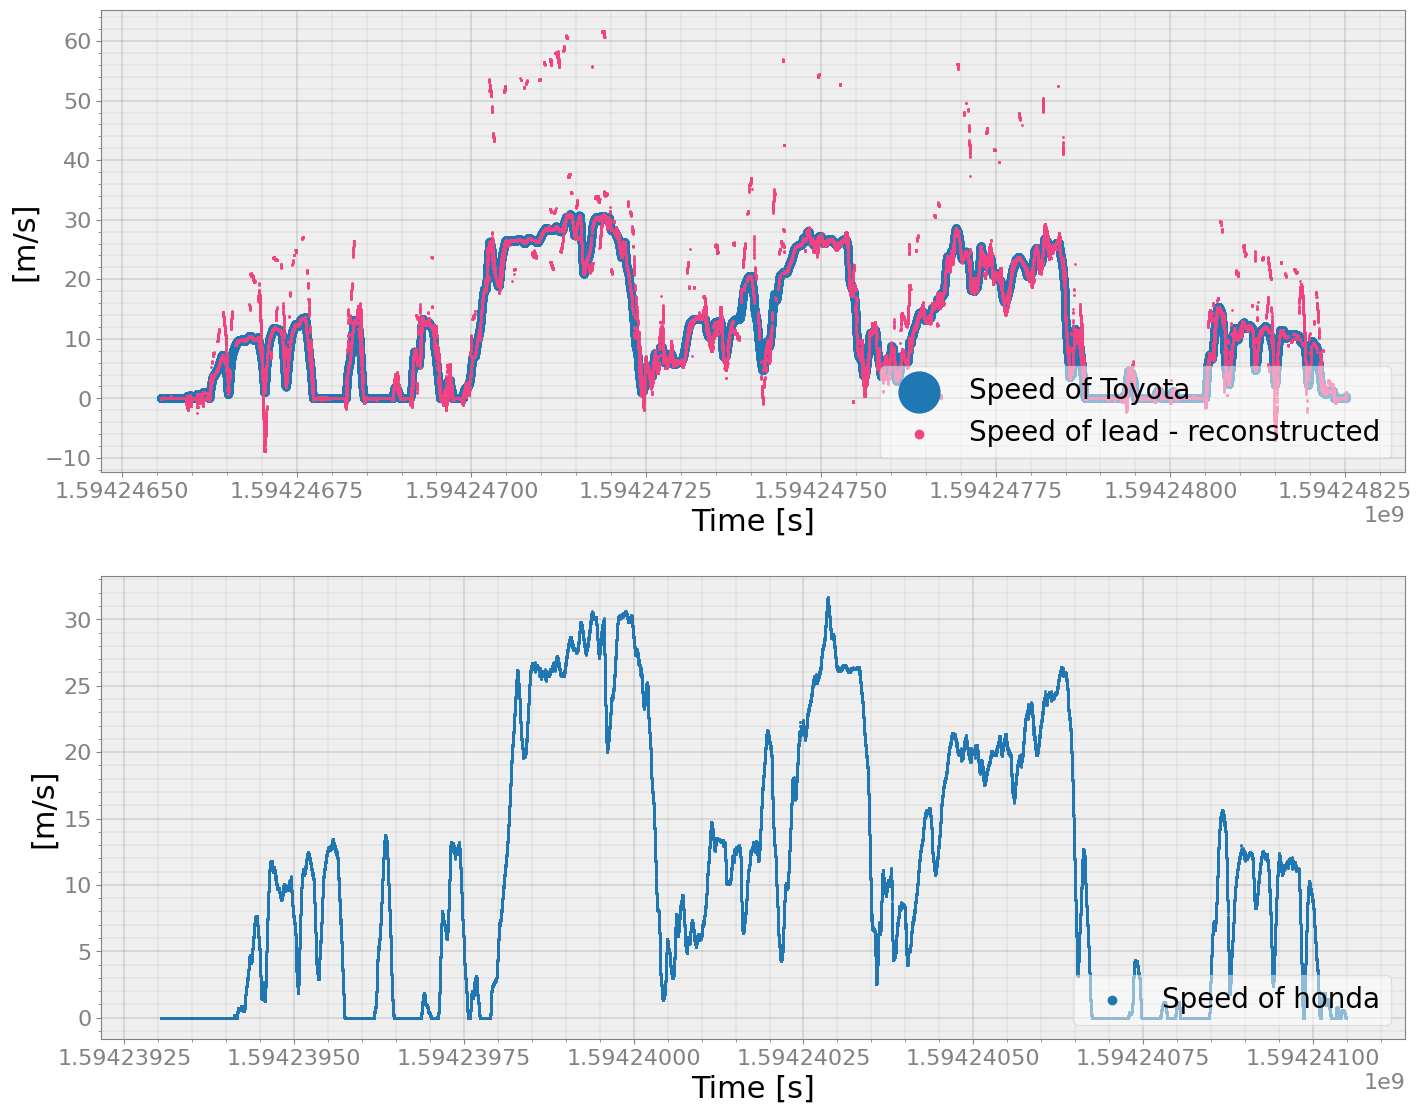

In [27]:
fig, ax = strymread.create_fig(2)
ax[0].scatter(x = 'Time', y = 'Message', data = toyota_speed, s= 24, label='Speed of Toyota')
ax[1].scatter(x = 'Time', y = 'Message', data = honda_speed, s= 1, label='Speed of honda')
ax[0].scatter(x = 'Time', y = 'Message', data = lead_reoncstructed, s= 1, color = "#f34283", label='Speed of lead - reconstructed')
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')

ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('[m/s]')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('[m/s]')


plt.show()

## Finding time shift between reconstructed speed of the lead vehicle and honda's speed

In [31]:
timeshift = strymread.time_shift(honda_speed, lead_reoncstructed)
print(timeshift)

-7201.897899150848


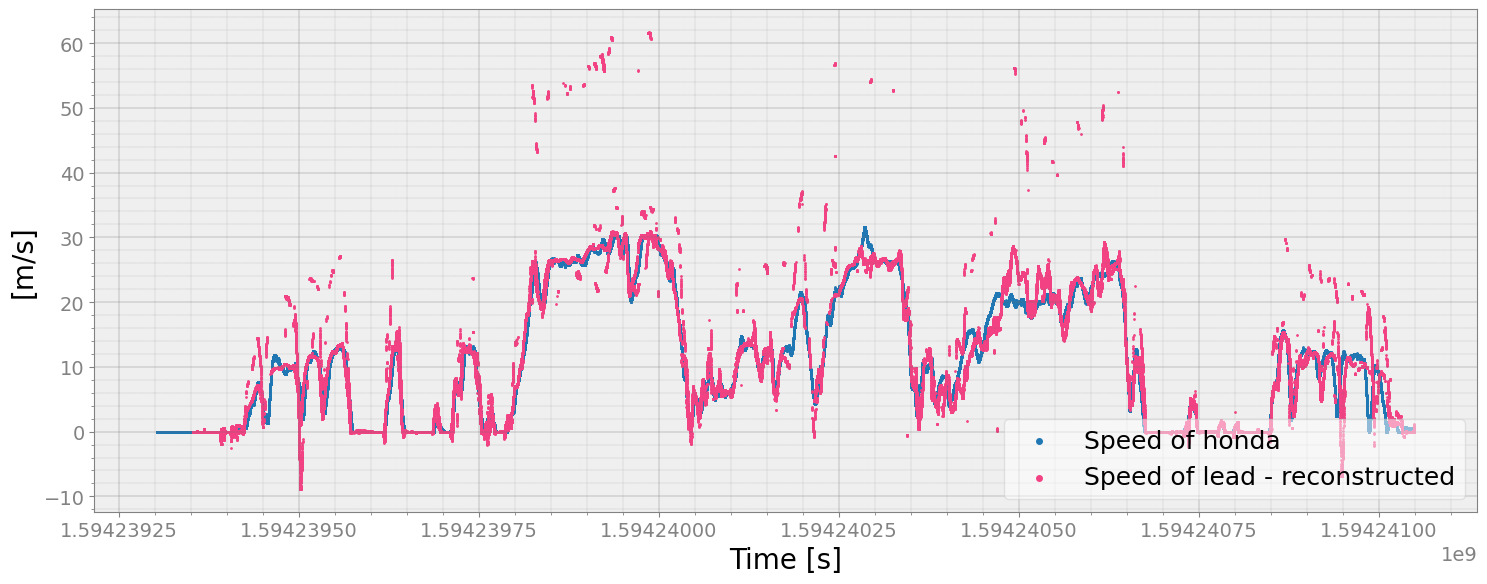

In [33]:
fig, ax = strymread.create_fig(1)
ax[0].scatter(x = 'Time', y = 'Message', data = honda_speed, s= 1, label='Speed of honda')
ax[0].scatter(x = lead_reoncstructed['Time']+timeshift, y = lead_reoncstructed['Message'], s= 1, color = "#f34283", label='Speed of lead - reconstructed')
ax[0].legend(loc='lower right')

ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('[m/s]')


plt.show()